# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** WAHYUNI FAJRIN ROSYIDAH
- **Email:** wahyunirosyidah@gmail.com
- **ID Dicoding:** A587XTM495

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan rata-rata penyewaan sepeda antara hari kerja dan hari libur?
- Bagaimana perbedaan jumlah penyewaan sepeda antara jam sibuk (Peak Hours) dan jam tidak sibuk (Off-Peak Hours)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

#### Memuat tabel day

In [2]:
day_df=pd.read_csv("dashboard/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Berdasarkan hasil diatas, diperoleh data kolom dan lima baris awal dari data yang dimiliki oleh file day.csv
- Dataset day.csv berisi data penyewaan sepeda dengan informasi seperti tanggal (dteday), musim (season), hari kerja atau libur (workingday, holiday), serta faktor cuaca (temp, hum, windspeed). Selain itu, terdapat jumlah penyewaan oleh pengguna casual, registered, dan totalnya dalam cnt.

#### Memuat tabel hour

In [3]:
hour_df=pd.read_csv("dashboard/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan hasil diatas, diperoleh data kolom dan lima baris awal dari data yang dimiliki oleh file hour.csv
- Dataset hour.csv memiliki struktur yang mirip dengan day.csv, tetapi dengan tingkat detail lebih tinggi karena mencatat data penyewaan sepeda per jam (hr). Kolom lainnya mencakup informasi tanggal (dteday), musim (season), tahun (yr), hari kerja atau libur (workingday, holiday), kondisi cuaca (weathersit, temp, hum, windspeed), serta jumlah penyewaan oleh pengguna casual, registered, dan totalnya dalam cnt. 

### Assessing Data

#### Menilai Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Terdapat kesalahan tipe data pada kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string)
- Tidak terdapat missing value pada tabel day

#### Memeriksa duplikasi pada tabel day

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Berdasarkan hasil diatas, tidak ditemukan nilai duplikasi pada data day_df sehingga seluruh nilai dari tiap kolom aman untuk diolah.

#### Menilai Data hour_df

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terdapat kesalahan tipe data pada kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string)
- Tidak terdapat missing value pada tabel hour

#### Memeriksa duplikasi pada tabel hour

In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Berdasarkan hasil diatas, tidak ditemukan nilai duplikasi pada data hour_df sehingga seluruh nilai dari tiap kolom aman untuk diolah.

### Cleaning Data

Pada proses assessing data, ditemukan beberapa kesalahan sebagai berikut:

1. Kolom dteday pada tabel **day** seharusnya direpresentasikan sebagai tipe data datetime, bukan object.
2. Kolom dteday pada tabel **hour** juga seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

Pada proses data cleaning, akan dilakukan perubahan tipe data pada kolom dteday di day_df dan hour_df agar sesuai dengan format yang seharusnya.

#### Clean day_df data

**Menangani kesalahan tipe data pada kolom dteday di day_df**

In [8]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Berdasarkan hasil yang diperoleh, tipe data pada kolom dteday yang sebelumnya adalah object berhasil diubah ke tipe data yang seharusnya yaitu datetime

#### Clean hour_df data

**Menangani kesalahan tipe data pada kolom dteday di hour_df**

In [9]:
datetime2_columns = ["dteday"]
for column in datetime2_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berdasarkan hasil yang diperoleh, tipe data pada kolom dteday yang sebelumnya adalah object berhasil diubah ke tipe data yang seharusnya yaitu datetime

## Exploratory Data Analysis (EDA)

### Explore day_df data

In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**

Berdasarkan rangkuman parameter statistik diatas, diperoleh jumlah penyewaan sepeda paling sedikit adalah 22 sepeda dan yang terbanyak adalah 8.714 sepeda dalam satu harinya. Pada penyewa casual, per harinya paling rendah adalah 2 sepeda dan 3.410 adalah jumlah penyewaan sepeda tertingginya. Sedangkan, pada penyewa registered, jumlah penyewaan sepeda paling sedikit adalah 20 sepeda dan jumlah terbanyak adalah 6946 sepeda dalam satu harinya.

#### Total Penyewaan Sepeda


In [11]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()


#by year
day_df['year'] = day_df['dteday'].dt.year
yearly_rentals = day_df.groupby(['year'])['cnt'].sum().reset_index()
day_df.groupby(by="year").agg({
    "registered":"sum",
    "casual":"sum",
    "cnt": "sum"
})

,registered,casual,cnt
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


**Insight:**
- Berdasarkan hasil diatas didapatkan total dari seluruh penyewaan sepeda selama tahun 2011-2012 yang tidak terdaftar adalah sebanyak 620.017 sepeda dan yang terdaftar sebanyak 2.672.662 sepeda. Total dari keseluruhan jumlah penyewa pada tahun 2011-2012 adalah 3.292.679 sepeda.
- Pada tahun 2011 dan 2012 didapatkan hasil dimana jumlah sepeda yang disewa dengan status keanggotaan registered lebih banyak dibandingkan dengan status keanggotaan casual.
- Dalam periode waktu satu tahun, jumlah penyewaan sepeda cukup meningkat dibandingkan dengan tahun sebelumnya. Ini menunjukkan adanya peningkatan yang konsisten dalam jumlah pengguna layanan penyewaan sepeda

#### Total Penyewaan Sepeda Per Bulan

In [12]:
monthly_rentals = day_df.groupby(['year', 'mnth'])['cnt'].sum().reset_index()
print(monthly_rentals)

    year  mnth     cnt
0   2011     1   38189
1   2011     2   48215
2   2011     3   64045
3   2011     4   94870
4   2011     5  135821
5   2011     6  143512
6   2011     7  141341
7   2011     8  136691
8   2011     9  127418
9   2011    10  123511
10  2011    11  102167
11  2011    12   87323
12  2012     1   96744
13  2012     2  103137
14  2012     3  164875
15  2012     4  174224
16  2012     5  195865
17  2012     6  202830
18  2012     7  203607
19  2012     8  214503
20  2012     9  218573
21  2012    10  198841
22  2012    11  152664
23  2012    12  123713


**Insight:**
- Berdasarkan hasil diatas, diperoleh data jumlah seluruh sepeda yang dirental per bulannya. Didapatan bahwa terjadi penurunan pada beberapa bulan terakhir pada tiap tahunnya.

#### Penyewaan Sepeda Tertinggi

In [13]:
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
monthly_rentals = day_df.groupby(['year', 'month'])['cnt'].sum().reset_index()

monthly_rentals['month'] = monthly_rentals['month'].apply(lambda x: calendar.month_name[x])
monthly_rentals['month'] = pd.Categorical(monthly_rentals['month'], categories=list(calendar.month_name[1:]), ordered=True)

year_2011= monthly_rentals[monthly_rentals['year'] == 2011]
highest_2011 = year_2011.loc[year_2011['cnt'].idxmax()]
highest_bymonth_2011 = highest_2011['month']
max_2011 = highest_2011['cnt']
    
year_2012= monthly_rentals[monthly_rentals['year'] == 2012]
highest_2012 = year_2012.loc[year_2012['cnt'].idxmax()]
highest_bymonth_2012 = highest_2012['month']
max_2012 = highest_2012['cnt']

print(f"Bulan dengan jumlah penyewa tertinggi di 2011: Bulan {highest_bymonth_2011}, dengan {max_2011} sepeda.")
print(f"Bulan dengan jumlah penyewa tertinggi di 2012: Bulan {highest_bymonth_2012}, dengan {max_2012} sepeda.")

Bulan dengan jumlah penyewa tertinggi di 2011: Bulan June, dengan 143512 sepeda.
Bulan dengan jumlah penyewa tertinggi di 2012: Bulan September, dengan 218573 sepeda.


**Insight:**
- Berdasarkan hasil diatas diperoleh jumlah penyewaan tertinggi pada tahun 2011 adalah pada bulan Juni dengan jumlah penyewaan 143512 dan pada tahun 2012 penyewaan tertinggi jatuh pada bulan September dengan total penyewaan 218573.

#### Penyewaan Sepeda di Working Day

In [14]:
day_df.groupby(by='workingday').agg({
    'cnt':['max','min','mean']
})

cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

**Insight:**
- Penyewaan rata-rata lebih tinggi di hari kerja. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan transportasi harian (misalnya pergi kerja atau ke sekolah).

#### Penyewaan Sepeda di Holiday

In [15]:
day_df.groupby(by='holiday').agg({
    'cnt':['max','min','mean']
})

cnt                   
          max   min         mean
holiday                         
0        8714    22  4527.104225
1        7403  1000  3735.000000

**Insight:**
- Penyewaan rata-rata lebih tinggi pada hari non-libur nasional atau non-holiday. Hal ini menunjukkan bahwa tidak semua orang menggunakan sepeda untuk rekreasi saat libur nasional.

#### Jumlah Penyewaan Sepeda Per Hari

In [16]:
weekday_desc = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

day_df['weekday_desc'] = day_df['weekday'].map(weekday_desc)
result = day_df.groupby(by="weekday_desc").agg({
    "cnt": ["max", "min", "mean", "std"]
})
result_sorted = result.sort_values(("cnt", "mean"), ascending=False)
result_sorted

cnt                                
               max   min         mean          std
weekday_desc                                      
Friday        8362  1167  4690.288462  1874.624870
Thursday      7804   431  4667.259615  1939.433317
Saturday      8714   627  4550.542857  2196.693009
Wednesday     8173   441  4548.538462  2038.095884
Tuesday       7767   683  4510.663462  1826.911642
Monday        7525    22  4338.123810  1793.074013
Sunday        8227   605  4228.828571  1872.496629

**Insight**:
- Hasil diatas menunjukkan statistik penyewaan sepeda berdasarkan hari dalam seminggu. Secara umum, penyewaan lebih tinggi pada hari kerja (terutama Jumat dan Kamis), yang mengindikasikan bahwa sepeda lebih banyak digunakan sebagai alat transportasi untuk bekerja, sedangkan pada akhir pekan (Sabtu dan Minggu), penyewaan tetap tinggi tetapi cenderung lebih bervariasi.

#### Pengaruh Cuaca Terhadap Penjualan Sepeda per Hari

In [17]:
weather_conditions = {
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain, Ice Pallets'
}

day_df['weather_desc'] = day_df['weathersit'].map(weather_conditions)
result = day_df.groupby(by="weather_desc").agg({
    "cnt": ["max", "min", "mean", "std"]
})

result

cnt                               
                         max  min         mean          std
weather_desc                                               
Clear, Few clouds       8714  431  4876.786177  1879.483989
Light Snow, Light Rain  4639   22  1803.285714  1240.284449
Mist + Cloudy           8362  605  4035.862348  1809.109918

**Insight:**

Berdasarkan kondisi cuaca per harinya, diperolah bahwa penyewaan tertinggi terjadi saat cuada cerah, sedikit berawan. Pada saat cuaca berkabut+berawan, jumlah penyewaan sepeda sedikit menurun. Sedangkan pada kondisi cuaca dengan gerimis, sedikit bersalju jumlah penyewaan mengalami penurunan drastis.

### Explore hour_df data

In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Berdasarkan rangkuman parameter statistik diatas, diperoleh jumlah penyewaan sepeda paling sedikit adalah 1 sepeda dan yang terbanyak adalah 977 sepeda per jamnya. Pada penyewa casual, per jamnya paling rendah adalah 0 sepeda dan 367 adalah nilai tertingginya. Sedangkan, pada penyewa registered, jumlah penyewaan sepeda paling sedikit adalah 0 sepeda dan jumlah terbanyak adalah 886 sepeda per jamnya.

**Insight:**
- Rata-rata penyewaan tertinggi pada angin sedang (207.41), disusul tinggi (204.25), dan terendah pada angin rendah (163.69).
- Kecepatan angin tidak terlalu mempengaruhi penyewaan sepeda secara signifikan.
- Penyewaan maksimum relatif sama di semua kategori (sekitar 900-977).
- Variasi penyewaan cukup besar (std tinggi), menunjukkan fluktuasi dalam jumlah penyewa di setiap kategori angin.

#### Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca per Jam

In [20]:
weather_conditions = {
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain, Ice Pallets'
}

hour_df['weather_desc'] = hour_df['weathersit'].map(weather_conditions)
result = hour_df.groupby(by="weather_desc").agg({
    "cnt": ["max", "min", "mean", "std"]
})

result

cnt                            
                         max min        mean         std
weather_desc                                            
Clear, Few clouds        977   1  204.869272  189.487773
Heavy Rain, Ice Pallets  164  23   74.333333   77.925178
Light Snow, Light Rain   891   1  111.579281  133.781045
Mist + Cloudy            957   1  175.165493  165.431589

**Insight**:
- Pada kondisi cuaca cerah, sedikit berawan (Clear, Few) clouds terjadi penyewaan yang tinggi
- Pada kondisi cuaca berkabut dan berawan (Mist + Cloudy), jumlah penyewaan sepeda sedikit menurun, namun jumlahnya tidak jauh dengan jumlah penyewaan saat kondisi cuaca cerah
- Pada kondisi cuaca dengan gerimis, sedikit bersalju (Light Snow, Light Rain) jumlah penyewaan mengalami sedikit penurunan
- Pada kondisi cuaca dengan hujan deras, hujan es (Heavy Rain, Ice Pallets) jumlah penyewaan mengalami penurunan yang sangat drastis, namun pada kondisi ini kolom nilai minimum jumlah penyewaan sepeda, memiliki nilai yang tinggi dibandingkan dengan cuaca lain yaitu 23 sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan rata-rata penyewaan sepeda antara hari kerja dan hari libur?


In [21]:
# Buat kategori baru berdasarkan kombinasi workingday dan holiday
day_df['Category'] = day_df.apply(lambda x: 
                                  'Working Day' if x['workingday'] == 1 else 
                                  'Holiday' if x['holiday'] == 1 else 
                                  'Non-Working Non-Holiday', axis=1)

# Kelompokkan data berdasarkan kategori baru
category_stats = day_df.groupby('Category')['cnt'].agg(['max', 'min', 'mean']).reset_index()

# Tampilkan hasil
print(category_stats.to_string(index=False))


               Category  max  min        mean
                Holiday 7403 1000 3735.000000
Non-Working Non-Holiday 8714  605 4389.685714
            Working Day 8362   22 4584.820000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13524\1548734086.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_stats, x='Category', y=metric, ax=ax[i], palette=colors)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13524\1548734086.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_stats, x='Category', y=metric, ax=ax[i], palette=colors)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13524\1548734086.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_stats, x='Category', y=metric, ax=ax[i], palette=col

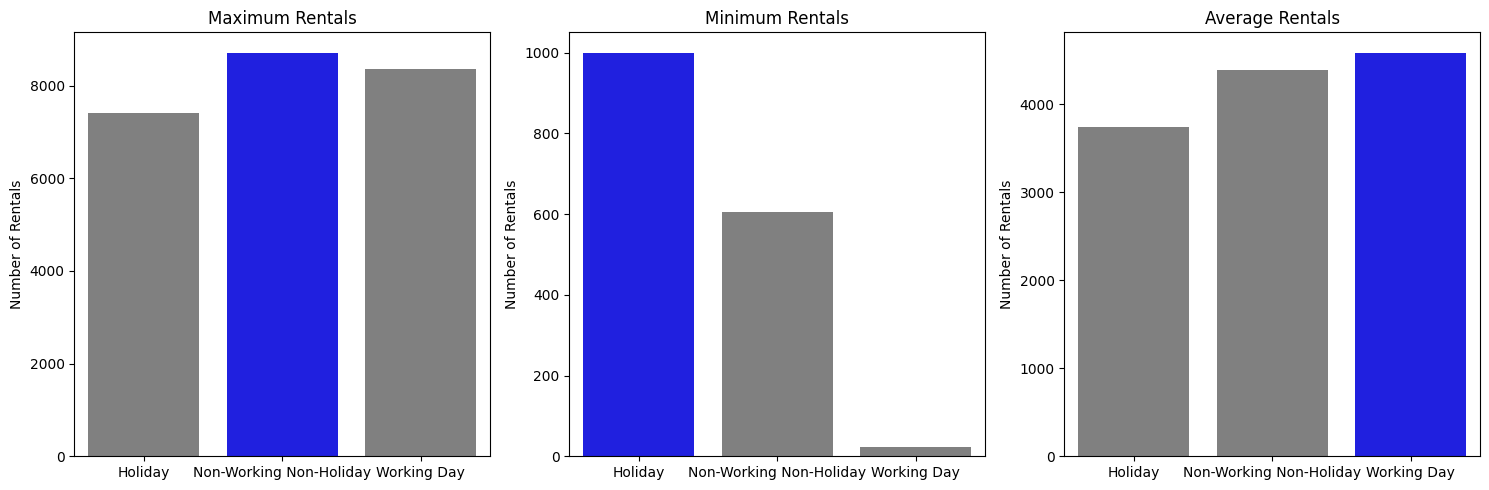

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['max', 'min', 'mean']
titles = ['Maximum Rentals', 'Minimum Rentals', 'Average Rentals']

for i, metric in enumerate(metrics):
    # Menentukan kategori dengan nilai tertinggi
    max_category = category_stats.loc[category_stats[metric].idxmax(), 'Category']
    
    # Menentukan warna: warna khusus untuk nilai tertinggi, lainnya pakai warna netral
    colors = ['gray' if cat != max_category else 'blue' for cat in category_stats['Category']]
    
    sns.barplot(data=category_stats, x='Category', y=metric, ax=ax[i], palette=colors)
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Number of Rentals (Unit)')
    ax[i].set_xlabel('')
    
plt.tight_layout()
plt.show()

**Insight**:
- Analisis ini bertujuan untuk memahami pola penggunaan sepeda berdasarkan jenis hari, sehingga dapat membantu dalam perencanaan operasional dan strategi promosi yang lebih tepat serta mengoptimalkan ketersediaan sepeda, menyesuaikan strategi harga, serta merancang promosi yang lebih efektif sesuai tren penggunaan.
- Hari Kerja memiliki rata-rata penyewaan tertinggi (4.584,82), menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi utama daripada sekadar rekreasi.
- Hari Libur Nasional memiliki rata-rata penyewaan terendah (3.735), menandakan bahwa orang cenderung kurang menggunakan sepeda saat libur nasional.
- Hari Tidak Bekerja tapi Bukan Libur Nasional memiliki jumlah penyewaan tertinggi (8.714 pada puncaknya), menunjukkan bahwa sepeda lebih populer untuk aktivitas santai saat libur non-resmi seperti akhir pekan atau cuti bersama.

### Pertanyaan 2: Bagaimana perbedaan jumlah penyewaan sepeda antara jam sibuk (Peak Hours) dan jam tidak sibuk (Off-Peak Hours)?

In [23]:
hourly_rentals = hour_df.groupby("hr")["cnt"].sum().reset_index()

q75 = hourly_rentals["cnt"].quantile(0.75) 
q25 = hourly_rentals["cnt"].quantile(0.25) 

hourly_rentals["Category"] = hourly_rentals["cnt"].apply(
    lambda x: "Peak Hour" if x >= q75 else ("Off-Peak Hour" if x <= q25 else "Normal Hour")
)

hourly_rentals = hourly_rentals.sort_values(by="cnt", ascending=False)

hourly_rentals

,hr,cnt,Category
17,17,336860,Peak Hour
18,18,309772,Peak Hour
8,8,261001,Peak Hour
16,16,227748,Peak Hour
19,19,226789,Peak Hour
13,13,184919,Peak Hour
12,12,184414,Normal Hour
15,15,183149,Normal Hour
14,14,175652,Normal Hour
20,20,164550,Normal Hour


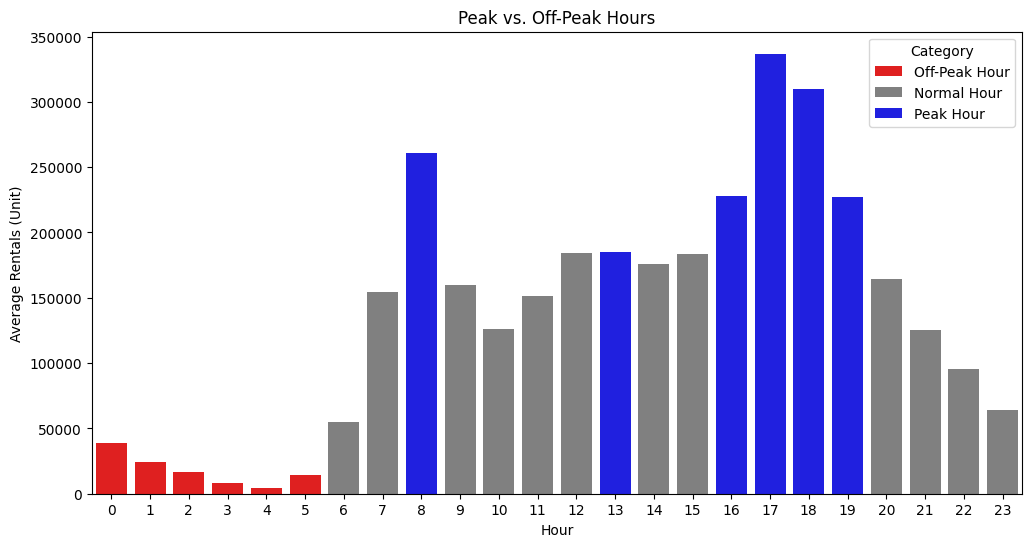

In [83]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x="hr", y="cnt", hue="Category", data=hourly_rentals, palette={"Peak Hour": "blue", "Off-Peak Hour": "red", "Normal Hour": "gray"})
plt.xlabel("Hour")
plt.ylabel("Average Rentals (Unit)")
plt.title("Peak vs. Off-Peak Hours")
plt.xticks(range(0, 24))
plt.legend(title="Category")
plt.show()

**Insight:**
- Analisis ini bertujuan untuk mengidentifikasi pola penggunaan layanan bike sharing berdasarkan waktu, sehingga dapat membantu dalam perencanaan operasional dan strategi bisnis seperti mengoptimalkan ketersediaan sepeda, mengatur jadwal pemeliharaan, serta menyusun strategi promosi yang lebih tepat waktu.
- Jam sibuk(Peak Hour) terjadi pada pukul 8 pagi dan 16-19 sore, dengan puncak penyewaan tertinggi terjadi pada pukul 17:00 (336.860 penyewaan) dan 18:00 (309.772 penyewaan).
- Jam normal terjadi di siang hingga malam hari (10:00-22:00), dengan penyewaan yang masih cukup tinggi, tetapi tidak setinggi jam sibuk. 
- Jam sepi (Off-Peak) terjadi antara pukul 00:00 hingga 05:00, dengan penyewaan terendah terjadi pada pukul 04:00 (4.428 penyewaan), yang menunjukkan bahwa sepeda hampir tidak digunakan di waktu dini hari.

## Analisis Lanjutan

### Analisis Pengaruh Kecepatan Angin Terhadap Penjualan Sepeda

In [80]:
def categorize_windspeed(wind):
    if wind < 0.25:
        return 'Low'
    elif wind < 0.40:
        return 'Medium'
    else:
        return 'High'

hour_df['windspeed_category'] = hour_df['windspeed'].apply(categorize_windspeed)
windspeed_stats = hour_df.groupby('windspeed_category')['cnt'].agg(['mean', 'max', 'min', 'std'])
windspeed_stats = windspeed_stats.sort_values(by='mean', ascending=False)
windspeed_stats



,mean,max,min,std
windspeed_category,,,,
Medium,212.606008,977,1,189.359003
High,198.576042,900,1,172.552978
Low,179.732262,976,1,178.053641


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13524\142376630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=windspeed_stats.index, y=windspeed_stats['mean'], palette=colors)


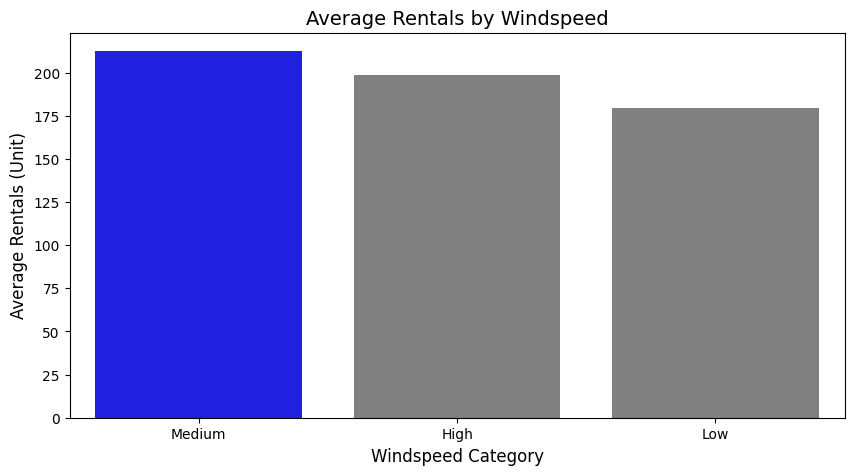

In [81]:
plt.figure(figsize=(10, 5))
max_category = windspeed_stats['mean'].idxmax()
colors = ["blue" if cat == max_category else "gray" for cat in windspeed_stats.index]

sns.barplot(x=windspeed_stats.index, y=windspeed_stats['mean'], palette=colors)

plt.title("Average Rentals by Windspeed", fontsize=14)
plt.xlabel("Windspeed Category", fontsize=12)
plt.ylabel("Average Rentals (Unit)", fontsize=12)
plt.show()

**Insight:**
- Tujuan analisis ini adalah untuk memahami pengaruh kecepatan angin terhadap jumlah penyewaan sepeda. Hasilnya dapat digunakan untuk memprediksi permintaan, mengoptimalkan strategi bisnis, dan menyesuaikan layanan agar tetap stabil dalam berbagai kondisi cuaca.
- Kecepatan angin kategori Medium (Sedang) memiliki rata-rata jumlah penyewaan tertinggi (212.61), dibandingkan kategori High (198.58) dan Low (179.73).
- Kategori Low (Rendah) memiliki rata-rata terendah, tetapi memiliki nilai maksimum penyewaan (976) yang hampir sama dengan Medium (977).
- Kecepatan angin tidak terlalu berpengaru terhadap jumlah penyewaan sepeda karena nilai rata-rata yang didapatkan ketiga kategori kecepatan angin tersebut tidak berbeda jauh.


#### Analisis Jumlah Penyewaan Sepeda Berdasarkan Kategori Waktu

In [45]:

batas = [0, 5, 11, 15, 19, 23]  
labels = ['Dini Hari', 'Pagi', 'Siang', 'Sore', 'Malam']

# Gunakan pd.cut() untuk binning
hour_df['time_bin'] = pd.cut(hour_df['hr'], bins=batas, labels=labels, include_lowest=True)
time_category = hour_df.groupby('time_bin')['cnt'].sum().reset_index()
time_category = time_category.sort_values(by='cnt', ascending=False)

time_category


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13524\4124192963.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_category = hour_df.groupby('time_bin')['cnt'].sum().reset_index()


,time_bin,cnt
3,Sore,1101169
1,Pagi,907319
2,Siang,728134
4,Malam,449548
0,Dini Hari,106509


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13524\909478338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='time_bin',


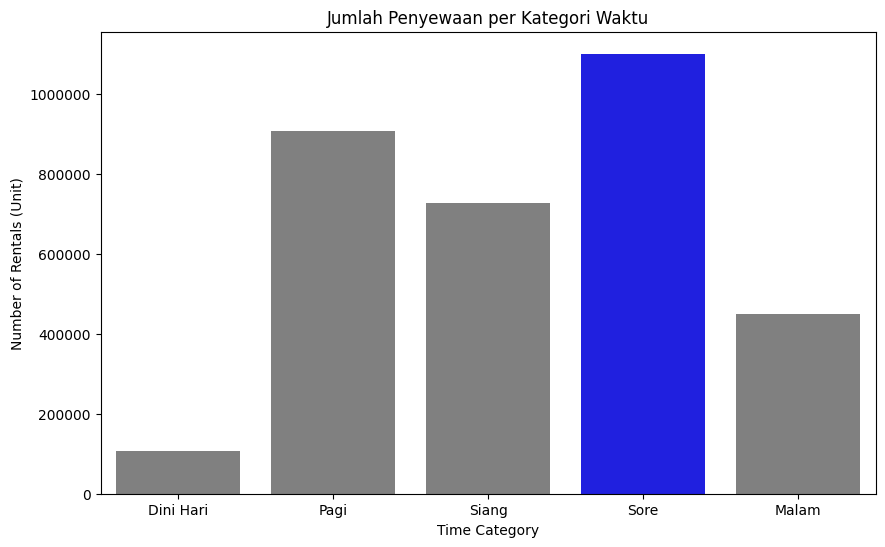

In [82]:
plt.figure(figsize=(10, 6))

max_value = time_category['cnt'].max()
colors = ['blue' if x == max_value else 'gray' for x in time_category['cnt']]

bar_plot = sns.barplot(x='time_bin', 
                       y='cnt', 
                       data=time_category, 
                       palette=colors)

plt.title('Jumlah Penyewaan per Kategori Waktu')
plt.xlabel('Time Category')
plt.ylabel('Number of Rentals (Unit)')

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

**Insight:**
- Tujuan analisis ini adalah untuk memahami pola penggunaan sepeda berdasarkan waktu agar dapat mengoptimalkan ketersediaan sepeda pada jam-jam sibuk, membantu perencanaan operasional, serta memberikan wawasan bagi bisnis dalam meningkatkan fasilitas pendukung. Selain itu, hasil analisis ini juga bermanfaat bagi pengguna untuk merencanakan perjalanan mereka dengan lebih efisien.
- Kategori Sore (15:00 - 19:00) memiliki jumlah penyewaan tertinggi dengan 1.101.169 penyewaan. Ini menunjukkan bahwa banyak orang menggunakan sepeda pada sore hari, kemungkinan besar untuk perjalanan pulang kerja/sekolah atau rekreasi.
- Kategori Pagi (05:00 - 11:00) berada di posisi kedua dengan 907.319 penyewaan. Ini bisa disebabkan oleh penggunaan sepeda untuk perjalanan ke kantor/sekolah dan olahraga pagi.
- Kategori Siang (11:00 - 15:00) memiliki penyewaan lebih rendah dibanding pagi dan sore dengan 728.134 penyewaan. Mungkin karena ini adalah waktu istirahat atau orang lebih memilih kendaraan lain saat cuaca panas.
- Kategori Malam (19:00 - 23:00) dan Dini Hari (00:00 - 05:00) memiliki jumlah penyewaan terendah dengan masing-masing 449.548 dan 106.509 penyewaan. Hal ini wajar karena lebih sedikit orang yang beraktivitas menggunakan sepeda di waktu-waktu ini.


#### Analisis Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Musim

In [29]:
# Mapping season ke deskripsi
season_conditions = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

season_avg_rentals = hour_df.groupby('season')['cnt'].mean().reset_index()
season_avg_rentals['season_desc'] = season_avg_rentals['season'].map(season_conditions)
season_avg_rentals

,season,cnt,season_desc
0,1,111.114569,Spring
1,2,208.344069,Summer
2,3,236.016237,Fall
3,4,198.868856,Winter


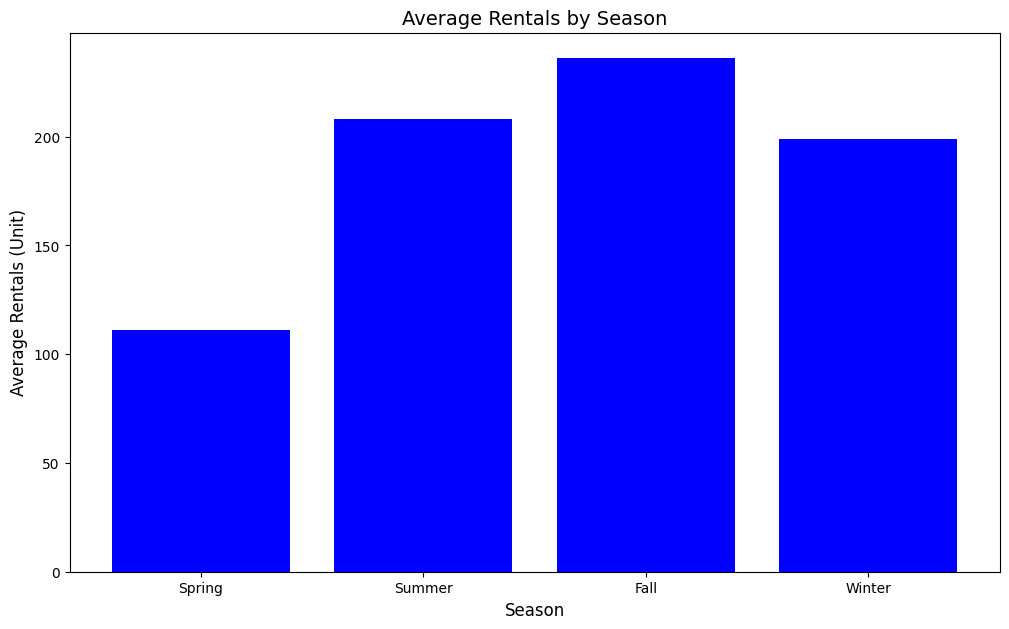

In [30]:
plt.figure(figsize=(12, 7))
plt.bar(season_avg_rentals['season_desc'], 
        season_avg_rentals['cnt'], 
        color=['blue'])

plt.title('Average Rentals by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rentals (Unit)', fontsize=12)

plt.show()


**Insight**:
-  Musim semi memiliki jumlah terendah yang mungkin disebabkan oleh curah hujan rendah atau faktor musiman lainnya. 
- Di musim panas, jumlah meningkat menjadi 208.34, kemungkinan akibat kondisi cuaca yang lebih kering atau perubahan lingkungan. 
- Musim gugur mencatat jumlah tertinggi, yaitu 236.02, yang bisa disebabkan oleh peningkatan curah hujan atau faktor alam lainnya. S
- Pada musim dingin, jumlah penyewaan mengalami penurunan menjadi 198.87, yang masih lebih tinggi dari musim semi dan panas, mungkin karena pengaruh salju atau hujan musim dingin.

## Conclusion

1. **Bagaimana perbedaan rata-rata penyewaan sepeda antara hari kerja dan hari libur?**
   
    Hasil analisis menunjukkan bahwa sepeda lebih banyak digunakan pada **hari kerja** dengan rata-rata penyewaan tertinggi sebesar 4.584,82. Hal ini mengindikasikan bahwa sepeda lebih sering dimanfaatkan sebagai alat transportasi utama dibandingkan sekadar untuk rekreasi. Sebaliknya, pada hari libur nasional, rata-rata penyewaan turun menjadi 3.735, yang menunjukkan bahwa orang cenderung lebih sedikit menggunakan sepeda saat hari libur resmi, kemungkinan karena aktivitas yang beralih ke tempat lain atau liburan keluarga.

    Menariknya, pada hari tidak bekerja tetapi bukan libur nasional, penyewaan sepeda justru mencapai puncaknya, yaitu 8.714. Hal ini mengindikasikan bahwa sepeda lebih diminati untuk aktivitas santai saat libur non-resmi, seperti akhir pekan atau cuti bersama. Kenaikan signifikan ini mungkin disebabkan oleh lebih banyaknya waktu luang, cuaca yang mendukung, atau meningkatnya minat masyarakat dalam bersepeda sebagai aktivitas rekreasi di luar jam kerja.

2. **Bagaimana perbedaan jumlah penyewaan sepeda antara jam sibuk (Peak Hours) dan jam tidak sibuk (Off-Peak Hours)?**
   
    Hasil analisis menunjukkan pola penyewaan sepeda berdasarkan waktu dalam sehari, yang terbagi menjadi jam sibuk, jam normal, dan jam sepi. Jam sibuk terjadi pada **pukul 8 pagi dan 16-19 sore**, dengan puncak penyewaan tertinggi pada pukul 17:00 (336.860 penyewaan) dan 18:00 (309.772 penyewaan). Hal ini mencerminkan pola perjalanan masyarakat saat berangkat dan pulang kerja atau sekolah, di mana sepeda banyak digunakan sebagai moda transportasi utama.

    Sementara itu, jam normal berlangsung dari 10:00 hingga 22:00, dengan jumlah penyewaan yang tetap tinggi, meskipun tidak setinggi jam sibuk. Sebaliknya, pada jam sepi (Off-Peak), yang terjadi antara 00:00 hingga 05:00, penyewaan menurun drastis, dengan titik terendah pada pukul 04:00 (4.428 penyewaan). Hal ini menunjukkan bahwa sepeda jarang digunakan pada dini hari. Secara keseluruhan, tren ini mengindikasikan bahwa penggunaan sepeda sangat dipengaruhi oleh rutinitas harian masyarakat, terutama terkait pekerjaan, sekolah, dan kebutuhan transportasi utama.